Here, I'll look into the defenders in the box, and its relations with covered yards and actual distanse run by rusher. 

In [4]:
#Import necessary libraries and load the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import plotly as py
from plotly.subplots import make_subplots
%matplotlib inline 

In [2]:
df = pd.read_csv('/Users/Elham/NFL_Files/train.csv', low_memory=False) 
df.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [3]:
df.columns #Checking the columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'],
      dtype='object')

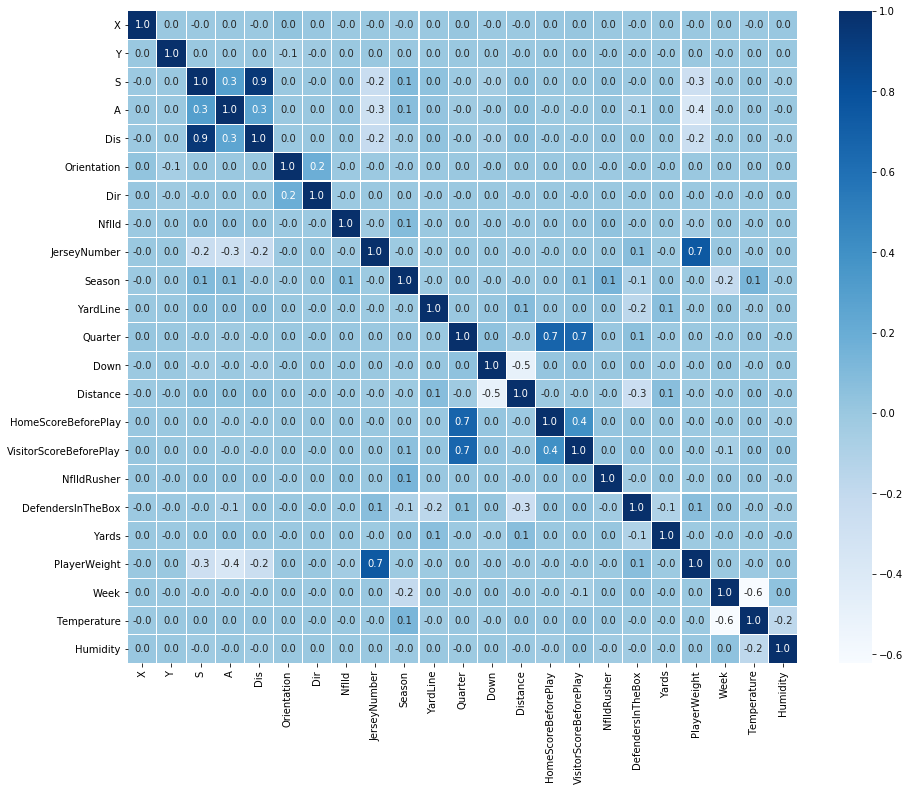

In [10]:
#Checking the correlations between the different features 

fig,ax = plt.subplots(figsize=(15,12))
corr_featurs = df.iloc[:,2:].corr()

sns.heatmap(corr_featurs, ax=ax, annot=True, linewidths=0.1, fmt='.1f', cmap="Blues")

plt.show()

It seems that there are only few features have direct but weak correlations with yards coverd in each play, and one of them is the number of defenders in the box, which I'd like to explore more in details with its relations with covered yards, and as well as with the actual distance that the rusher traveled from prior time point. 

In [25]:
#The defenders in the box in each play and the corresponded yards and rusher's running actual distanse
df_defenders = df[df.NflId==df.NflIdRusher].loc[:,['PlayId','DefendersInTheBox', 'Yards', 'Dis']]
df_defenders.head()

,PlayId,DefendersInTheBox,Yards,Dis
18,20170907000118,6.0,8,0.38
40,20170907000139,6.0,3,0.34
62,20170907000189,7.0,5,0.60
84,20170907000345,9.0,2,0.46
98,20170907000395,7.0,7,0.44


In [60]:
#The average gained yards and rusher’s traveled distance in facing different number of defenders in the box 
defenders_vs_rusher = df_defenders.groupby('DefendersInTheBox')[['Yards', 'Dis']].mean()
defenders_vs_rusher

,Yards,Dis
DefendersInTheBox,,
2.0,15.500000,0.405000
3.0,10.416667,0.299583
4.0,7.108434,0.367831
5.0,5.546614,0.408430
6.0,4.679530,0.436311
7.0,4.238575,0.454119
8.0,3.640726,0.454403
9.0,2.739691,0.446881
10.0,0.777293,0.453843


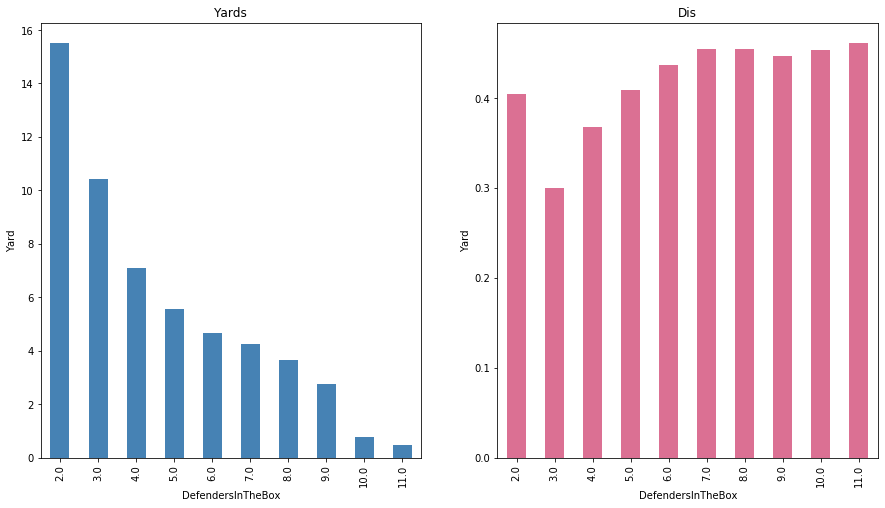

In [52]:
#plot the yards coverd in each play and rusher's running distance facing different number of defenders in the box
fig, axs = plt.subplots(1, 2, figsize=(15,8))

defenders_vs_rusher["Yards"].plot(ax=axs[0], color='steelblue', kind='bar')
axs[0].set_title('Yards')

defenders_vs_rusher["Dis"].plot(ax=axs[1], color='palevioletred', kind='bar')
axs[1].set_title('Dis')

axs[0].set_ylabel('Yard')
axs[1].set_ylabel('Yard')


plt.show()

It looks like Yards have stronger correlations with the number of defenders in the box than the actual distace run by the rusher.

In [ ]:
dfd_2 = df_defenders[df_defenders.DefendersInTheBox==2]['Yards']
dfd_3 = df_defenders[df_defenders.DefendersInTheBox==3]['Yards']
dfd_4 = df_defenders[df_defenders.DefendersInTheBox==4]['Yards']
dfd_5 = df_defenders[df_defenders.DefendersInTheBox==5]['Yards']
dfd_6 = df_defenders[df_defenders.DefendersInTheBox==6]['Yards']
dfd_7 = df_defenders[df_defenders.DefendersInTheBox==7]['Yards']
dfd_8 = df_defenders[df_defenders.DefendersInTheBox==8]['Yards']
dfd_9 = df_defenders[df_defenders.DefendersInTheBox==9]['Yards']
dfd_10 = df_defenders[df_defenders.DefendersInTheBox==10]['Yards']
dfd_11 = df_defenders[df_defenders.DefendersInTheBox==11]['Yards']

num_dfd = [dfd_2, dfd_3, dfd_4, dfd_5, dfd_6, dfd_7, dfd_8, dfd_9, dfd_10, dfd_11 ]

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 7)) 

bp = ax.boxplot(Top3_Formation, labels=['SINGLEBACK', 'SHOTGUN', 'I_FORM]'], notch=True,  
                         vert=True,patch_artist=True)

ax.set_title('Offense Formation & Yards Covered')
ax.set_xlabel('Offense Formation')
ax.set_ylabel('Yards Covered')
ax.yaxis.grid(True)

#Zoom up  
#x1, x2, y1, y2 = 0.5, 3.5, -10, 15

#ax.set_xlim(x1, x2)
#ax.set_ylim(y1, y2)

plt.show()